# Experiment results

This notebook computes some results for a given experiment. It does not aggregate over all experiments.

In [1]:
EXPERIMENT = 57

In [2]:
%cd ../..
%matplotlib inline

D:\Projects\Python\PL-Heuristic


In [3]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from analysis.caching import get_cached_results, has_cached_results, store_results
from analysis.measures import compute_measures

In [4]:
# Computing the measures for an entire experiment can be quite slow, so we normally
# work with cached data.
if has_cached_results(EXPERIMENT):
    results = get_cached_results(EXPERIMENT)
else:
    results = compute_measures(EXPERIMENT)
    store_results(EXPERIMENT, results)

# Analysis

In [5]:
# Sanity check
assert len(results) == 100

In [6]:
df = pd.DataFrame(results, index=np.arange(1, 101))
df.describe()

,heuristic_classroom_utilisation,heuristic_instruction_size,heuristic_objective,heuristic_percentage_instruction,heuristic_percentage_self_study,heuristic_self_study_size,heuristic_teacher_utilisation,ilp_classroom_utilisation,ilp_instruction_size,ilp_objective,ilp_percentage_instruction,ilp_percentage_self_study,ilp_self_study_size,ilp_teacher_utilisation
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000,1.000000e+02,100.000000,100.000000,100.00000,100.00000,100.000000,100.000
mean,9.883721e+01,8.723080,8764.721001,32.630000,67.370000,42.693202,53.125,9.883721e+01,9.701131,8834.756721,38.38000,61.62000,45.293990,53.125
std,5.712979e-14,0.672237,104.306917,3.488693,3.488693,0.850915,0.000,5.712979e-14,0.613013,104.067790,3.51269,3.51269,1.120456,0.000
min,9.883721e+01,7.421053,8539.169863,26.437500,58.062500,41.214286,53.125,9.883721e+01,8.533333,8614.825624,32.00000,54.00000,43.520000,53.125
25%,9.883721e+01,8.172414,8691.305981,29.625000,64.875000,42.111111,53.125,9.883721e+01,9.290323,8763.795283,36.00000,58.00000,44.521739,53.125
50%,9.883721e+01,8.638559,8768.830691,32.125000,67.875000,42.480000,53.125,9.883721e+01,9.650794,8836.679539,38.00000,62.00000,45.090909,53.125
75%,9.883721e+01,9.213115,8839.769797,35.125000,70.375000,43.202083,53.125,9.883721e+01,10.338462,8914.996143,42.00000,64.00000,46.400000,53.125
max,9.883721e+01,10.484375,8986.634795,41.937500,73.562500,45.428571,53.125,9.883721e+01,10.985075,9044.608945,46.00000,68.00000,48.000000,53.125


## Objective

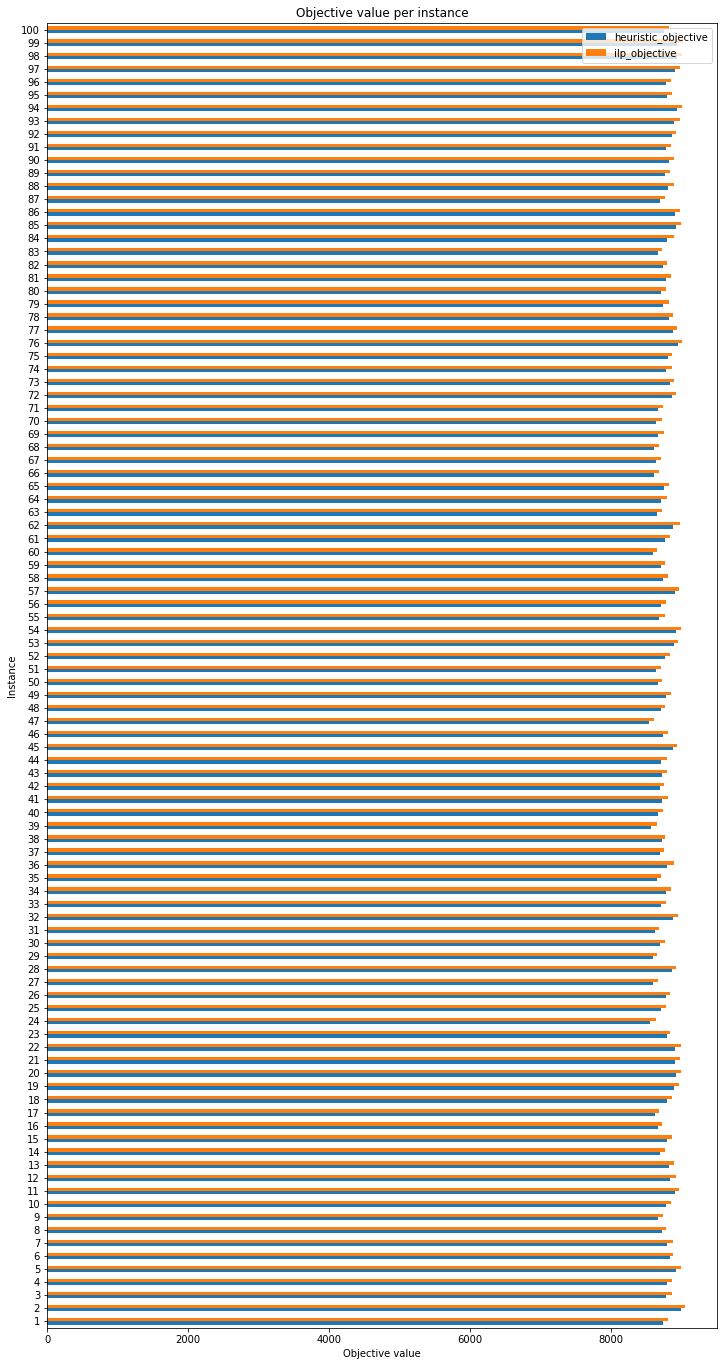

In [7]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Objective value per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Objective value")

df[["heuristic_objective", "ilp_objective"]].plot.barh(ax=ax)

In [8]:
heuristic_objective = df['heuristic_objective'].mean()
ilp_objective = df['ilp_objective'].mean()

difference = 100 * (heuristic_objective - ilp_objective) / ilp_objective

print(f"Percentage difference between heuristic and optimal solution is {difference:.2f}%.")
print(f"The averages are {ilp_objective:.2f} (ilp), against {heuristic_objective:.2f} (heuristic).")

Percentage difference between heuristic and optimal solution is -0.79%.
The averages are 8834.76 (ilp), against 8764.72 (heuristic).


## Percentages instruction and self-study

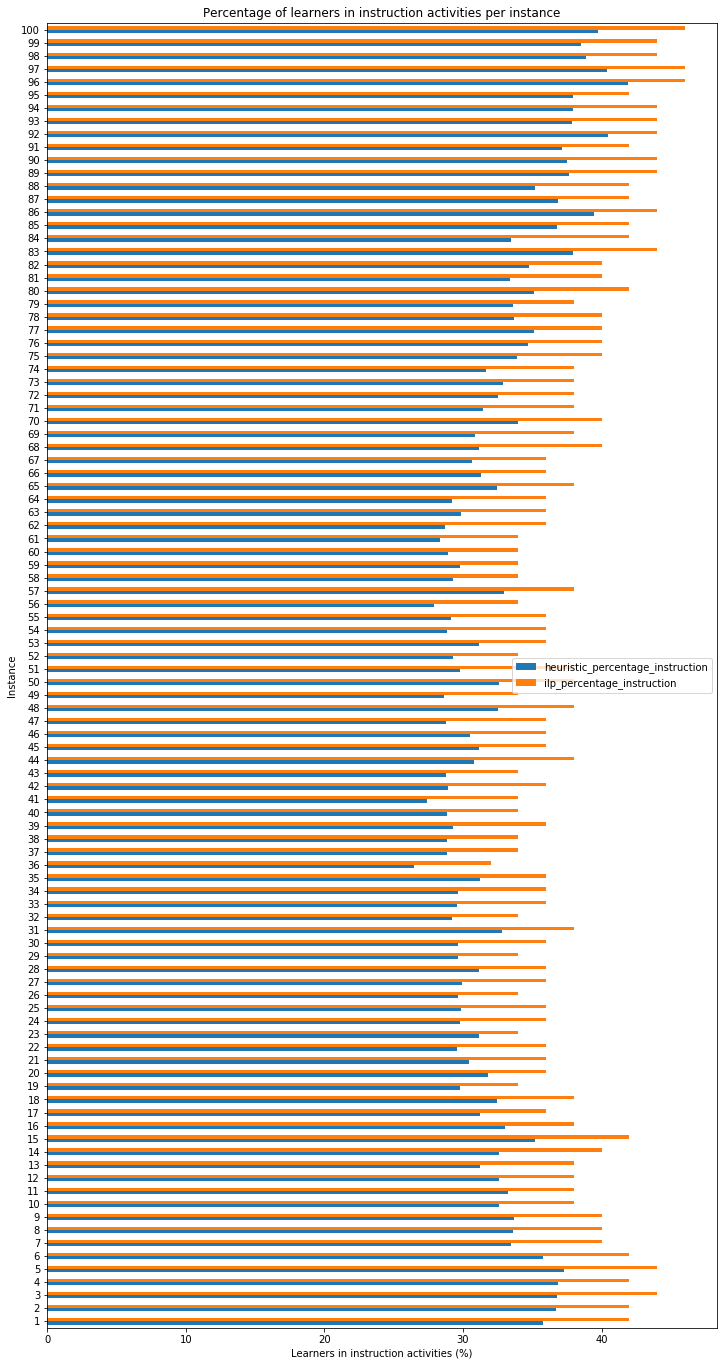

In [9]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Percentage of learners in instruction activities per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Learners in instruction activities (%)")

df[["heuristic_percentage_instruction", "ilp_percentage_instruction"]].plot.barh(ax=ax)

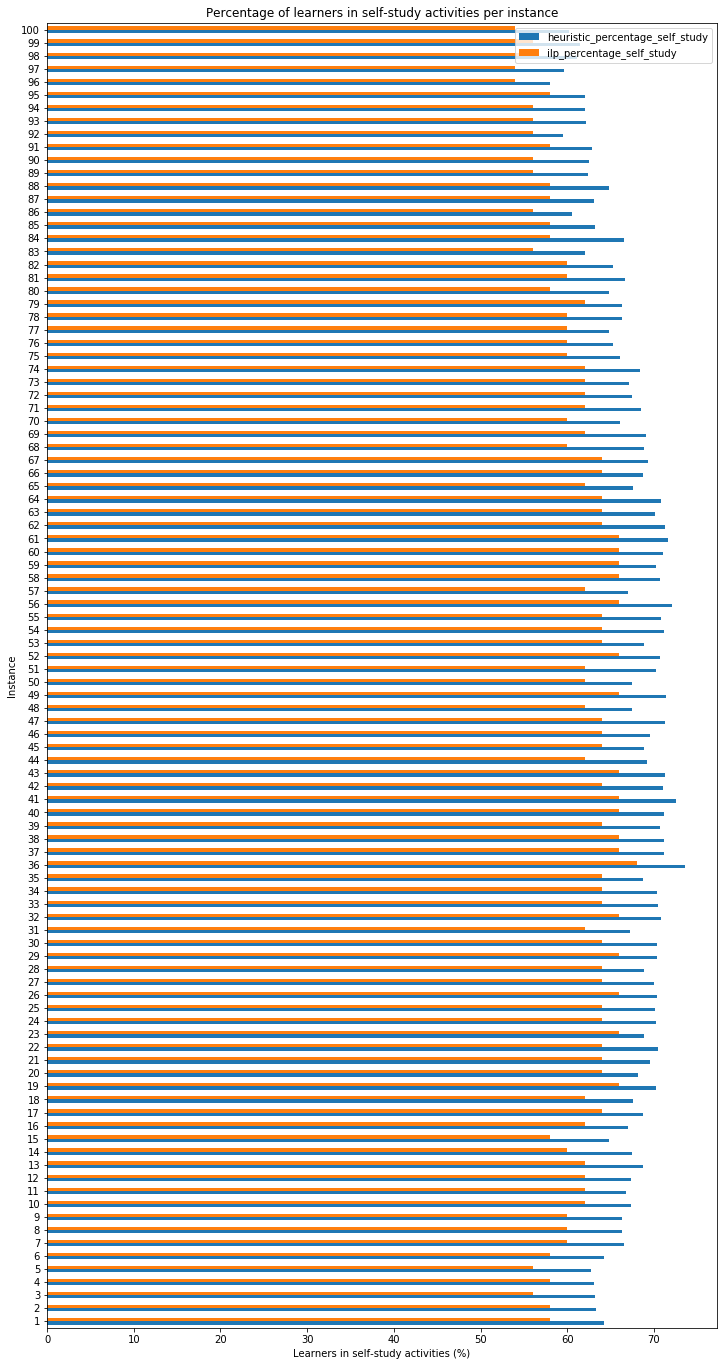

In [10]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Percentage of learners in self-study activities per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Learners in self-study activities (%)")

df[["heuristic_percentage_self_study", "ilp_percentage_self_study"]].plot.barh(ax=ax)

In [11]:
heuristic_percentage_self_study = df['heuristic_percentage_self_study'].mean()
ilp_percentage_self_study = df['ilp_percentage_self_study'].mean()

difference = 100 * (heuristic_percentage_self_study - ilp_percentage_self_study) / ilp_percentage_self_study

print(f"On average, the heuristic solution has {difference:.2f}% more learners in self-study activities.")
print(f"The averages are {ilp_percentage_self_study:.2f}% (ilp), against {heuristic_percentage_self_study:.2f}% (heuristic).")

On average, the heuristic solution has 9.33% more learners in self-study activities.
The averages are 61.62% (ilp), against 67.37% (heuristic).


## Activity sizes

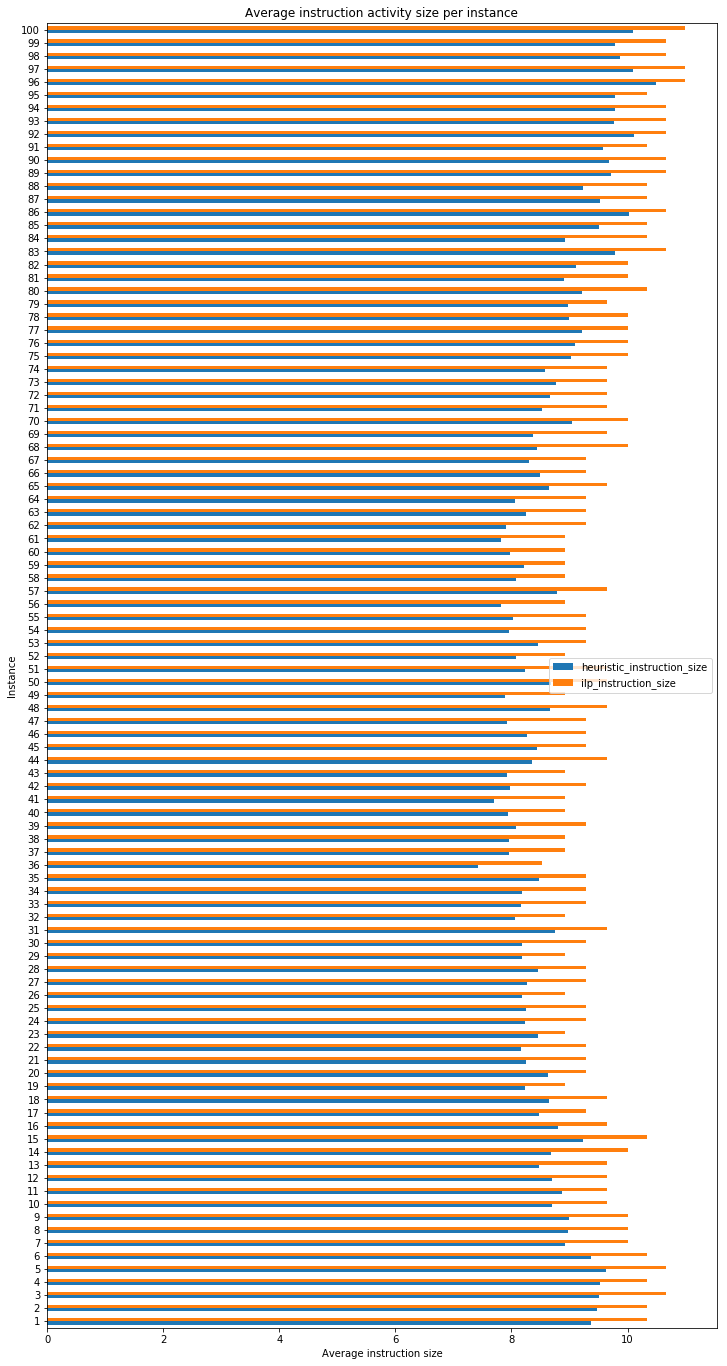

In [12]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Average instruction activity size per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Average instruction size")

df[["heuristic_instruction_size", "ilp_instruction_size"]].plot.barh(ax=ax)

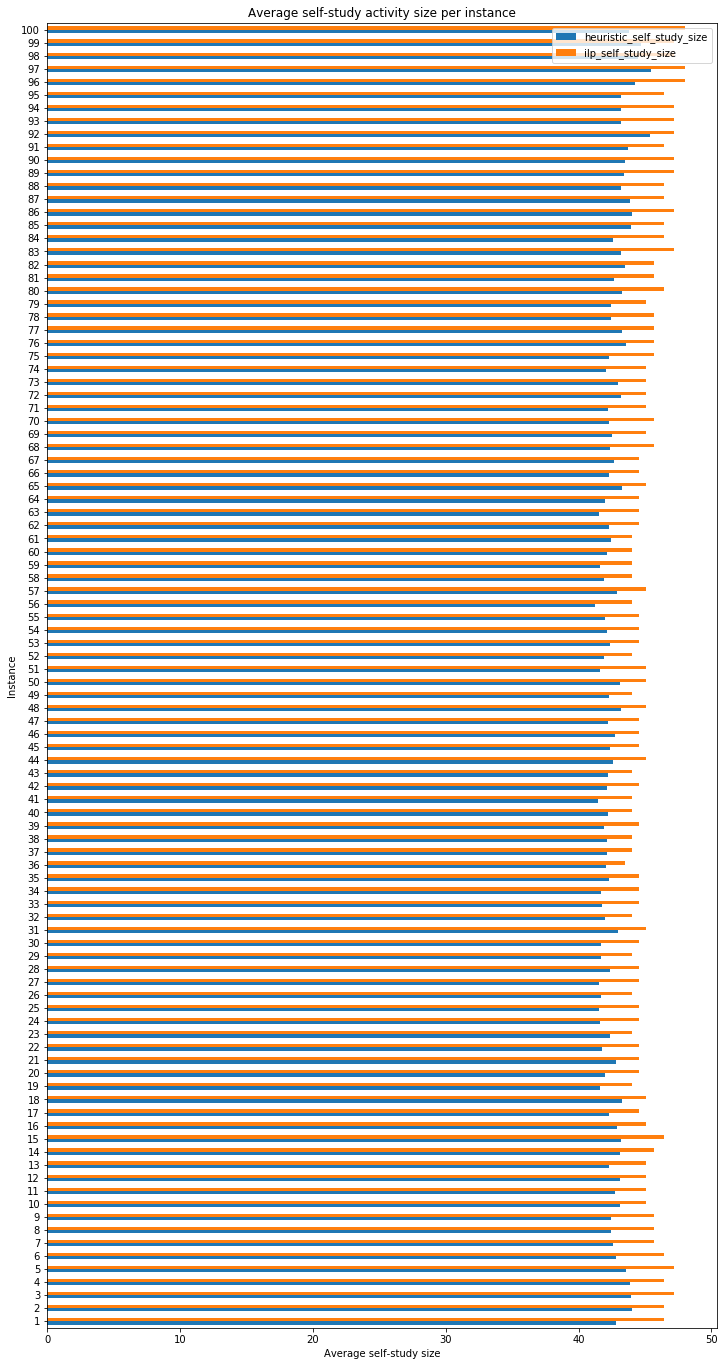

In [13]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Average self-study activity size per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Average self-study size")

df[["heuristic_self_study_size", "ilp_self_study_size"]].plot.barh(ax=ax)

# Classroom and teacher pool utilisation

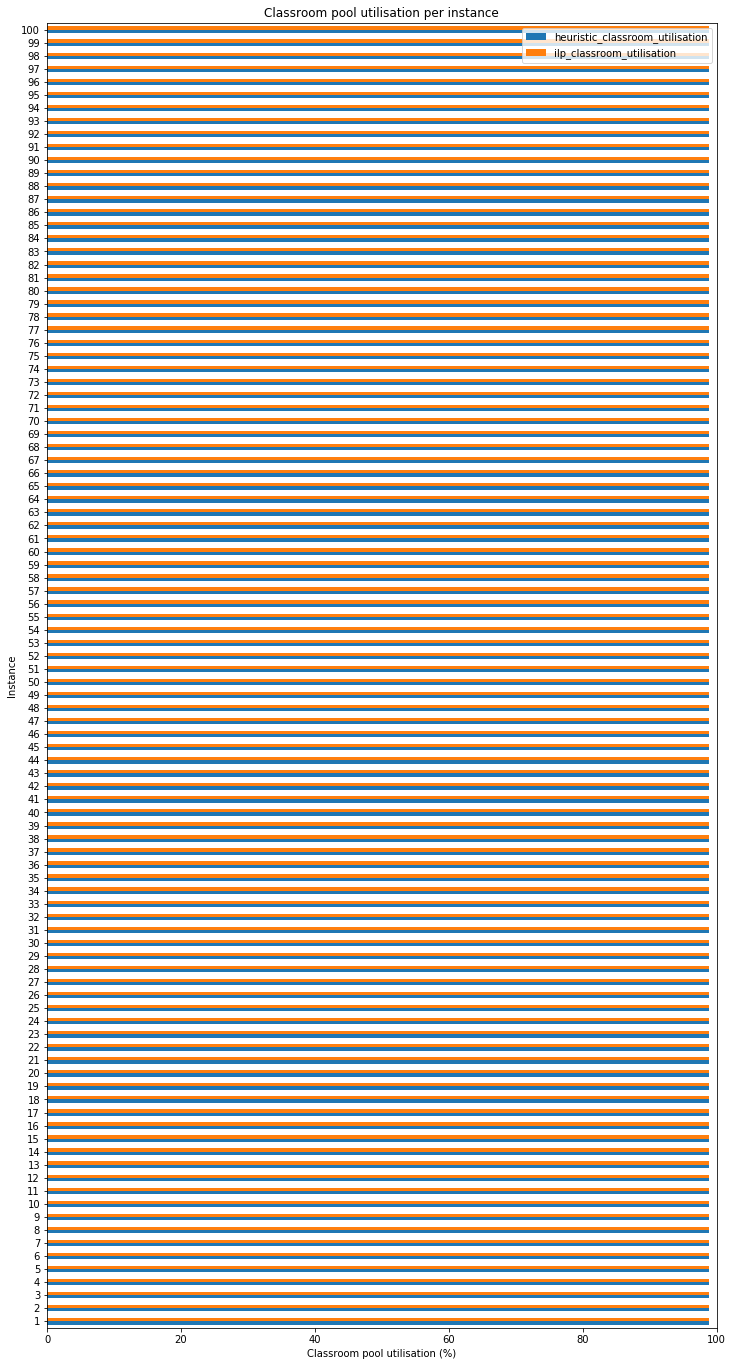

In [14]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_xlim(0, 100)
ax.set_title("Classroom pool utilisation per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Classroom pool utilisation (%)")

df[["heuristic_classroom_utilisation", "ilp_classroom_utilisation"]].plot.barh(ax=ax)

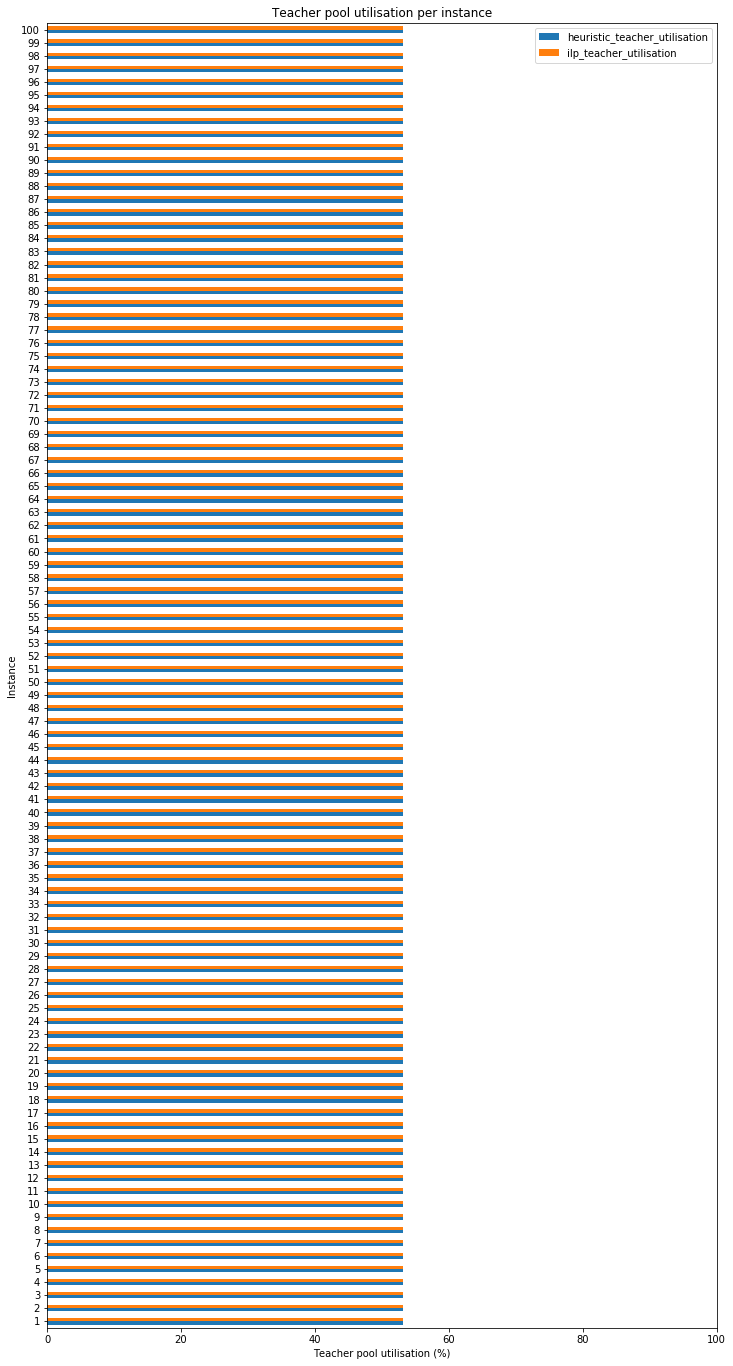

In [15]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_xlim(0, 100)
ax.set_title("Teacher pool utilisation per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Teacher pool utilisation (%)")

df[["heuristic_teacher_utilisation", "ilp_teacher_utilisation"]].plot.barh(ax=ax)